In [ ]:
!pip install plotly
!pip install dash #developed for building reactive web applications.dash board
!pip install wordcloud #specifically word cloud can be used in the field of nlp for the importance of a word
!pip install cufflinks # is a library that can work with the #pandas library.
!pip install missingno #to visualise missing data

Let's import our libraries
____________

In [2]:
import numpy as np 
import pandas as pd
import seaborn as sns
import os
import missingno

# plotly
import plotly as py
from plotly.offline import init_notebook_mode, iplot, plot
init_notebook_mode(connected=True)  # Start Plotly in inline mode to display plots inline (equivalent to %matplotlib inline)

import plotly.graph_objs as go  # Low-level interface for Plotly for data visualization
import plotly.express as px  # High-level interface for Plotly for data visualization, allowing for complex visuals with less code

# word cloud library
from wordcloud import WordCloud

# matplotlib
import matplotlib.pyplot as plt
import cufflinks as cf  # A library that integrates with Pandas for data visualization
cf.go_offline()  # Setting up offline mode for the visualizations

# warnings
import warnings
warnings.filterwarnings("ignore")  # Suppress warnings to avoid unnecessary clutter in the code output


Now let's load the data set we're going to sample. First of all, let's define the data. Our dataset contains information about universities around the world, including various characteristics and ratings. Each characteristic contains information according to criteria that evaluate different aspects of universities.
_____

In [3]:
timesData = pd.read_csv("https://raw.githubusercontent.com/arnaudbenard/university-ranking/master/timesData.csv")
timesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2603 entries, 0 to 2602
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   world_rank              2603 non-null   object 
 1   university_name         2603 non-null   object 
 2   country                 2603 non-null   object 
 3   teaching                2603 non-null   float64
 4   international           2603 non-null   object 
 5   research                2603 non-null   float64
 6   citations               2603 non-null   float64
 7   income                  2603 non-null   object 
 8   total_score             2603 non-null   object 
 9   num_students            2544 non-null   object 
 10  student_staff_ratio     2544 non-null   float64
 11  international_students  2536 non-null   object 
 12  female_male_ratio       2370 non-null   object 
 13  year                    2603 non-null   int64  
dtypes: float64(4), int64(1), object(9)
memor

Our dataset contains a total of 14 features. These are:

•world_rank: The global ranking of universities.

•university_name: The name of the university.

•country: The country where the university is located.

•teaching: A score indicating the quality of teaching.

•international: A measure indicating the international diversity and engagement.

•research: A score representing the research performance of the university.

•citations: The number of citations or impact of the university’s research outputs.

•income: The income or financial health of the university.

•total_score: A score indicating the overall performance of the universities.

•num_students: The number of students enrolled at the university.

•student_staff_ratio: The ratio of students to staff members.

•international_students: The percentage or number of international students at the university.

•female_male_ratio: The ratio of female to male students.

•year: The year the data was collected.

Now, I would like to select the first 100 rows of our dataset and create visualization examples based on this data.
________________

In [4]:
df = timesData.iloc[:100, :]

Coding with Plotly

The syntax of the Plotly library might seem complex compared to other visualization libraries. However, once you grasp its underlying logic, you can construct code snippets as easily as filling in a blank space. To do this, it's essential to understand Plotly's Figure object.

The Figure object typically consists of two main components: Data and Layout.

Data: This component holds the information about the traces or graphical elements that you want to plot. Each trace represents a particular type of plot, such as a scatter plot, bar chart, or line graph.

Layout: This component defines the appearance of the plot, including elements like titles, axis labels, background colors, and other stylistic settings.

By combining these two components, you can build complex and interactive visualizations in Plotly.
____

![Plotly Figure Explanation](plotly_photo.gif)


Example: Below is an example of creating a simple scatter plot using plotly.
___

In [5]:
import plotly.graph_objects as go

# Data
trace = go.Scatter(x=[1, 2, 3, 4], y=[10, 11, 12, 13])

# Layout
layout = go.Layout(title='Simple Line Chart', xaxis=dict(title='X Axis'), yaxis=dict(title='Y Axis'))

# Figure
fig = go.Figure(data=[trace], layout=layout)

# Plot
fig.show()


___


Line Chart

A line chart is a type of graph commonly used to display values that change over time. It is particularly useful for showing trends, making comparisons, and making predictions based on changes over time.

Let’s create a line chart using the Plotly library. With this code snippet, we will generate a plot titled “Citation and Teaching vs World Rank of Top 100 Universities.” This plot will depict the relationship between world ranking (on the x-axis) and both citation count and teaching score (on the y-axis) for the top 100 universities. Each line will be displayed in a different color, and when hovering over any point, the name of the corresponding university will be displayed.
___

In [6]:
#plt.style.use("ggplot")
# Creating trace 1

trace1 = go.Scatter(
                    x = df.world_rank,
                    y = df.citations,
                    mode = "lines",    # Determines the drawing mode for this scatter trace. 
                                       # If "mode=text", the text elements appear at the coordinates. 
                                       # Otherwise, the text elements appear on hover. 
                                       # If there are fewer than 20 points and the trace is not stacked, the default is "lines+markers". Otherwise, "lines".
                    name = "citations",
                    marker = dict(color = "rgb(16, 112, 2)"), # {"color" : "rgb(16, 112, 2)"}
                    text = df.university_name)

# Creating trace 2
trace2 = go.Scatter(
                    x = df.world_rank,
                    y = df.teaching,
                    mode = "lines + markers",
                    name = "teaching",
                    marker = dict(color = "rgb(80,26,80)",
                                  size = 10,
                                  symbol = "star",
                                  line = dict(
                                         color = "yellow",
                                         width = 1),),
                    text = df.university_name)

data = [trace1, trace2]

layout = dict(title = "Citation and Teaching vs World Rank of Top 100 Universities",  # Think of this as the axes configuration
              xaxis = dict(title = "World Rank", ticklen = 5, tickcolor = "crimson", zeroline = False),
              yaxis = dict(title = "Value", ticklen = 5, tickcolor = "crimson", zeroline = False))

fig = dict(data = data, layout = layout)  # We pass the graph variables and layout parameters as a dictionary to the figure object
iplot(fig)                                # We plot the figure using iplot(fig)


___

Scatter Plot

A scatter plot is a type of graph used to visually distinguish the relationship between two variables, data distribution and data groups.

Now let's draw a scatter plot with plotly. With this piece of code, it is aimed to visualise the world rankings of the top 100 universities in 2014, 2015 and 2016 against their citation numbers with a scatter plot.
___

In [7]:
# Filtering the data to include the top 100 universities' citation counts for the years 2014, 2015, and 2016.
df2014 = timesData[timesData.year == 2014].iloc[:100,:]
df2015 = timesData[timesData.year == 2015].iloc[:100,:]
df2016 = timesData[timesData.year == 2016].iloc[:100,:]

# creating trace 1
trace1 = go.Scatter(
                    x = df2014.world_rank,
                    y = df2014.citations,
                    mode = "markers",
                    name = "2014",
                    marker = dict(color = "rgb(255,128,255)"),
                    text = df2014.university_name)
# creating trace 2
trace2 = go.Scatter(
                    x = df2015.world_rank,
                    y = df2015.citations,
                    mode = "markers",
                    name = "2015",
                    marker = dict(color = "rgb(255,128,2)"),
                    text = df2015.university_name)
# creating trace 3
trace3 = go.Scatter(
                    x = df2016.world_rank,
                    y = df2016.citations,
                    mode = "markers",
                    name = "2016",
                    marker = dict(color = "green"),
                    text = df2016.university_name)
data = [trace1, trace2, trace3]

layout = dict(title = "Citation vs Work Rank of Top 100 Universities with 2014, 2015, 2016",title_x = 0.5, title_y = 0.9,
             xaxis = dict(title = "World Rank"),
             yaxis = dict(title = "Citation"))

fig = dict(data = data, layout = layout)
iplot(fig)

___

Bar Charts
Bar charts are preferred for displaying the values of categorical data, making comparisons between them, visualising data distribution and frequency distribution. To summarise, bar charts are used to visualise categorical data values or frequencies and to make comparisons between different categories.

Now let's draw a bar chart with plotly. This code fragment shows a grouped bar chart showing the citations and teaching values of three selected universities in 2014.
___

In [8]:
# prepare data frames
df2014 = timesData[timesData.year == 2014].iloc[:3,:]
# import graph objects as "go"
import plotly.graph_objs as go
# create trace1 
trace1 = go.Bar(
                x = df2014.university_name,
                y = df2014.citations,
                name = "citations",
                marker = dict(color = 'rgba(255, 174, 255, 0.5)',
                             line=dict(color='rgb(0,0,0)',width=1.5)))
# create trace2 
trace2 = go.Bar(
                x = df2014.university_name,
                y = df2014.teaching,
                name = "teaching",
                marker = dict(color = 'rgba(255, 255, 128, 0.5)',
                              line=dict(color='rgb(0,0,0)',width=1.5)))
data = [trace1, trace2]
layout = go.Layout(barmode = "group")
fig = go.Figure(data = data, layout = layout)
iplot(fig)

___

Pie Chart

Pie charts are used to show the proportional distribution of certain parts of a whole, to visualise categorical data, to show parts within a whole. Pie charts are also suitable for obtaining information about how much certain parts of a total (e.g. a budget, population or sales) make up.
___

Apart from this, there are a few important points to be considered when using Pie charts. These are;

Few Categories: Pie charts are generally best for a small number of categories. If there are too many categories, the chart may become difficult to read.

Sum of Percentages: The sum of the percentages of the slices should be 100%.

Labelling: In pie charts it is important that the labels or descriptions of what the slices represent are clear and readable.

Now let's draw a pie chart with plotly. With this piece of code, the student numbers of certain universities are shown in a pie chart. Each slice represents a university. Hovering over the slices displays the name of the university and the percentage of that slice. In addition, the last two university slices are highlighted off-centre and the graph has a donut-shaped gap.
___

In [9]:
# First, we filter the data for the year 2016 and select the first 7 records.
df2016 = timesData[timesData.year == 2016].iloc[:7,:]

# We take the num_students column, remove the commas, and convert the string to float.
df = df2016.num_students
df1 = (df.str.replace(",", "")).astype("float")
df2 = list((df.str.replace(",", "")).astype("float"))

# We use list comprehension to convert the values in the num_students column to float.
pie_list = [float(each.replace(",", "")) for each in df2016.num_students]

# Using the labels variable, we assign names to the slices of the pie chart.
labels = df2016.university_name

# We create the Figure object.
fig = {
    "data" : [
        {
            "values" : pie_list,  # Values that will determine the percentage slices.
            "labels" : labels,  # Label for each slice.
            "domain" : {"x": [0, .5]},  # Positioning of the chart.
            "name" : "Number Of Students Rates",  # Name of the chart.
            "hoverinfo" : "label + percent",  # Information displayed on hover.
            "hole" : .2,  # Size of the hole in the center, making it a donut chart.
            "type" : "pie",  # Type of the chart.
            "pull" : [0,0,0,0,0, 0.2, 0.2]  # Pulling out specific slices to emphasize them, here the last two slices are pulled out.
        },
    ],
    "layout" : {
        "title" : "Universities Number of Students Rates",  # Main title.
        "annotations" : [
            {"font" : {"size" : 20},  # Font size.
             "text" : "Number of Students",  # Annotation text.
             "x" : 0.3,  # X position.
             "y" : 1  # Y position.
            },
        ]
    }
}

# We plot the created Figure object.
iplot(fig)


___

Buble Chart
A bubble chart is a type of chart that is often used to show three-dimensional data together.
___
The main reasons for using bubble chart:

Displaying Three Dimensional Data: An extended version of a scatter plot that visualises two variables on the X and Y axes. However, each data point is represented by a bubble and the size of this bubble indicates a third variable.

Showing the Relationship Between Values: Shows the relationship between the X and Y axes, also considering the magnitude of a third variable.

Providing Extra Information: The colours of the bubbles can also be used to indicate a fourth variable, so that more information can be presented together.
____

Some points to be considered when using a bubble chart:

Readability: When there are too many bubbles or bubbles are too close together, the chart can become cluttered and difficult to read.

Size Can Be Misleading: When comparing the areas of two bubbles, differences in size can be misleading to the human eye.

Effective Labelling: Especially when there are many bubbles, labels indicating which bubble belongs to which data need to be clear and readable.

To summarise, a bubble chart is used to visualise the relationship of three or more variables together.

Let's draw a bubble chart with plotly. With this piece of code, the world ranking of universities is shown on the X axis and the teaching scores are shown on the Y axis. Each dot represents a university, the colours of the dots change according to their international scores and their sizes change according to the number of students. This graph shows the comparison of teaching and international scores of various universities.
___

In [10]:
df2016 = timesData[timesData.year == 2016].iloc[:20,:]  # Select the top 20 universities in the world for the year 2016

num_students_size = [float(each.replace(",", ".")) for each in df2016.num_students]  # Convert the num_students column to float

international_color = [float(each) for each in df2016.international]  # Convert the international column to float

data = [  # Define the data for creating the scatter plot
    {
        "y" : df2016.teaching,  # Use the teaching column for the y-axis
        "x" : df2016.world_rank,  # Use the world_rank column for the x-axis
        "mode" : "markers",  # Use markers mode for the scatter plot
        "marker" : {  # Set the marker properties
            "color" : international_color,  # Set the marker color using the international_color list
            "size" : num_students_size,  # Set the marker size using the num_students_size list
            "showscale" : True  # Display the color scale
        },
        "text" : df2016.university_name  # Display the university name for each marker
    }
]
iplot(data)  # Plot the graph


___


Histogram
A histogram is a type of graph used to show the distribution of values in a data set.
___



The main reasons for the use of histograms:

Showing Data Distribution: A histogram shows the frequency distribution of values in a data set. That is, it shows how frequent values in certain ranges are.

Evaluating Central Tendency and Dispersion: With a histogram, you can visually assess measures of central tendency, such as the mean, mode, median, and measures of dispersion, such as variance and standard deviation, of a data set.

Observing Normal Distribution: A histogram can be used to understand whether the data set has a normal distribution.

Detecting Outliers: Outliers that appear on the histogram in different shapes or in unexpected places may indicate the presence of outliers or special cases.
___

Some points to be considered when using histograms:

Bin Selection: The width of the columns called ‘bins’ in the histogram is important. If too many bins are used, the natural variation in the data set becomes apparent; if too few bins are used, the structure of the data set may be lost.

Uniform Distribution: Having all bins of the same width makes it easier to correctly interpret the data distribution.

In summary, a histogram is used to visualise the frequency distribution of a data set and to evaluate the central tendency and dispersion.

Now let's plot a histogram with plotly. With this code fragment, two histograms showing the distribution of the student-staff ratio in universities between 2011 and 2012 are plotted. Since the histograms overlap, their transparency is adjusted with the opacity parameter. In this way, the differences and similarities between the two years can be observed more clearly.
___

In [11]:
# 1. Assigns the student-staff ratio for the year 2011 to the variable x2011.
x2011 = timesData.student_staff_ratio[timesData.year == 2011]

# 2. Assigns the student-staff ratio for the year 2012 to the variable x2012.
x2012 = timesData.student_staff_ratio[timesData.year == 2012]

# 3. Creates a histogram for the year 2011.
trace1 = go.Histogram(
    x=x2011,  # Assigns the x2011 variable to the X-axis.
    opacity=0.75,  # Sets the opacity of the histogram.
    name = "2011",  # Names the histogram.
    marker=dict(color='rgba(171, 50, 96, 0.6)')  # Sets the color of the histogram.
)

# 4. Creates another histogram for the year 2012.
trace2 = go.Histogram(
    x=x2012,  # Assigns the x2012 variable to the X-axis.
    opacity=0.75,  # Sets the opacity of the histogram.
    name = "2012",  # Names the histogram.
    marker=dict(color='rgba(12, 50, 196, 0.6)')  # Sets the color of the histogram.
)

# 5. Puts the two histograms into a data list.
data = [trace1, trace2]

# 6. Sets the layout and titles of the graph.
layout = go.Layout(
    barmode='overlay',  # Enables the histograms to overlap each other.
    title='Students-Staff Ratio in 2011 and 2012',  # Sets the title of the graph.
    xaxis=dict(title='Students-Staff Ratio'),  # Sets the title of the X-axis.
    yaxis=dict(title='Count')  # Sets the title of the Y-axis.
)

# 7. Creates a Figure object using the data and layout.
fig = go.Figure(data=data, layout=layout)

# 8. Plots the created Figure object.
iplot(fig)


___
Word Cloud

Word cloud is used to visualise words in text data according to their frequency or importance.

___
Word cloud chart kullanımının ana nedenleri:

Showing Word Frequency: The word cloud shows frequently occurring words in the text in larger sizes and less frequent words in smaller sizes. This allows you to quickly observe which words or concepts are prominent in the text.

Visual Summary of Text Data: Used to quickly summarise key concepts and themes from a large chunk of text and present them in a visual way.

Analysing Graffiti, Surveys and Social Media Content: Used to determine which concepts or words are popular, especially in short texts such as graffiti, survey responses or social media posts.
___

Things to consider when using word cloud chart:

Filtering Unimportant Words: Common words such as ‘and’, ‘but’, ‘with’, which are usually unimportant for the content, can become dominant in the word cloud. Filtering such words (stop words) is often useful.

Careful Design: Aesthetic elements such as word placement, colour choice and font selection are important for the word cloud to be effective and meaningful.

In summary, a word cloud chart is used to quickly visualise the key concepts of text data and frequently occurring words.

Now let's make a word cloud example with plotly. With this code fragment, a word cloud is created and displayed using the names of the countries specified in 2011. The word cloud presents the names of the countries in a visually appealing way and saves the saved graph as ‘graph.png’ on your computer.
___

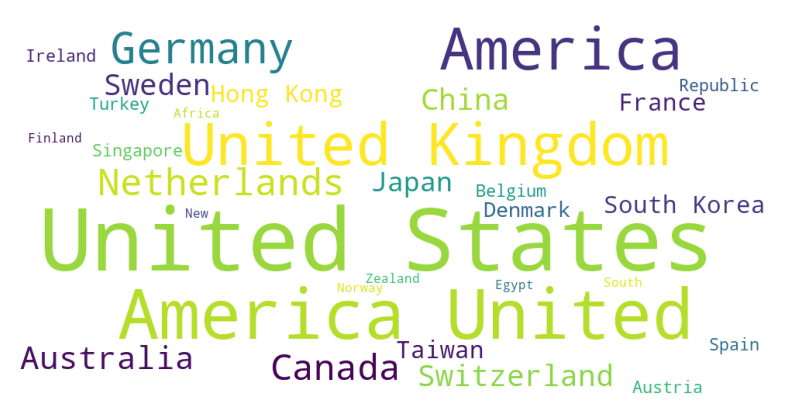

In [12]:
# 1. Assigns the countries for the year 2011 to the variable x2011.
x2011 = timesData.country[timesData.year == 2011]

# 2. Creates a subplot with a size of 10x10.
plt.subplots(figsize = (10, 10))

# 3. Creates a word cloud by combining the countries in the x2011 variable.
wordcloud = WordCloud(
    background_color= "white",  # Sets the background color of the word cloud to white.
    width = 1000,  # Sets the width of the word cloud.
    height= 500  # Sets the height of the word cloud.
).generate(" ".join(x2011))

# 4. Displays the created word cloud.
plt.imshow(wordcloud)

# 5. Turns off the axes to display only the word cloud.
plt.axis("off")

# 6. Saves the graph as "graph.png" on your computer.
plt.savefig("graph.png")

# 7. Shows the graph on the screen.
plt.show()


___
Box Plots

Box plot, bir veri setinin özet istatistiklerini (medyan, çeyreklikler, aykırı değerler vb.) göstermek için kullanılan bir grafik türüdür.
___


Main reasons for using box plot:

Showing Data Distribution: The box plot provides a summary of the data distribution, showing the central tendency, dispersion and outliers of the data set.

Making Comparisons: Facilitates comparison by juxtaposing data distributions between different categories or groups.

Detecting Outliers: The box plot clearly shows potential outliers in the data set.

Evaluating the Shape of the Distribution: It visually provides information such as whether the data is symmetric, how compact or spread out the distribution is.
___

Points to consider when using box plot:

Data Structure: Box plot is suitable for continuous (quantitative) data. When used with categorical (qualitative) data, a separate box plot can be created for each category.

Understanding Data Distribution: The box plot shows summary statistics such as median, first and third quartiles, but not the full details of the data distribution (e.g., whether there is a mode or bimodal distribution).

In summary, a box plot is used to visualise the summary statistics of a data set, to detect outliers and to make comparisons between different groups or categories.

Now let's draw a box plot with plotly. With this piece of code, we will draw two Box Plot graphs for the total scores (total_score) and research scores (research) of universities in 2015. With these Box Plots, we will get visual information about the summary statistics of the data (median, quartiles, minimum, maximum and outliers).
___

In [13]:
# 1. Assigns the data for the year 2015 to the variable x2015.
x2015 = timesData[timesData.year == 2015]

# 2. Creates a Box Plot using the x2015.total_score data.
trace0 = go.Box(
    y=x2015.total_score,  # Specifies the data to be displayed on the y-axis of the Box Plot.
    name = 'Total Score of Universities in 2015',  # Specifies the name of the plot.
    marker = dict(color = 'rgb(12, 12, 140)')  # Specifies the color of the plot.
)

# 3. Creates a Box Plot using the x2015.research data.
trace1 = go.Box(
    y=x2015.research,  # Specifies the data to be displayed on the y-axis of the Box Plot.
    name = 'Research of Universities in 2015',  # Specifies the name of the plot.
    marker = dict(color = 'rgb(12, 128, 128)')  # Specifies the color of the plot.
)

# 4. Collects the created Box Plots into a list.
data = [trace0, trace1]

# 5. Plots the created Box Plots.
iplot(data)


___
Scatter Matrix Plots

Scatter Matrix Plots (also called ‘pair plots’) are a visualisation method used to examine the relationship between multiple continuous variables.
___

Main reasons for using Scatter Matrix Plots:

Observing Relationships Between Variables: Used to quickly visualise potential relationships or correlations between multiple variables.

Showing Data Distribution: Shows the distribution of each variable for itself (usually in the form of a histogram or kernel density estimation) on the main diagonal.

Multivariate Data Analysis: Scatter matrix can help to understand the interactions of variables in multivariate data sets.

Detecting Outliers and Data Densities: Outliers or special data densities can be observed in scatter plots that show the relationship between variables.
___

Considerations when using Scatter Matrix Plots:

Data Density: When there are too many observations or variables, scatter matrix plots can be dense and difficult to read. In this case, sampling or more specific variable selection may be useful.

Categorical Variables: These types of plots are generally more appropriate for continuous variables. If categorical variables are included, visualisation can be done using different colouring or symbols.

In summary, Scatter Matrix Plots can be used to quickly visualise the relationships between multiple continuous variables, examine the distributions of variables and perform multivariate data analysis.

Now let's plot a Scatter Matrix Plots with plotly. This piece of code creates a scatter plot matrix based on the ‘research’, ‘international’, and ‘total_score’ columns of universities in 2015. The scatter plot matrix contains a series of scatter plots showing the relationships between multiple variables. Box plots on the diagonal show summary statistics for the variable of interest. The ‘Portland’ colour scheme chosen makes the graph more readable and understandable.
___

In [14]:
# 1. Imports the figure_factory module from Plotly.
import plotly.figure_factory as ff

# 2. Assigns the data for the year 2015 to the variable dataframe.
dataframe = timesData[timesData.year == 2015]

# 3. Selects specific columns from the dataframe and assigns them to the variable data2015.
data2015 = dataframe.loc[:,["research","international", "total_score"]]

# 4. Adds a new "index" column to the data2015 DataFrame and assigns sequential numbers to this column.
data2015["index"] = np.arange(1,len(data2015)+1)

# 5. Creates a scatter plot matrix using the data2015 data.
fig = ff.create_scatterplotmatrix(data2015, diag='box', index='index', colormap='Portland',
                                  colormap_type='cat', height=700, width=700)

# 6. Plots the created scatter plot matrix.
iplot(fig)


___
Animation with Plotly

As you know, Plotly is a popular library for creating interactive graphics, so it can be used to add a dynamic dimension to animations and data visualisations over time.
___

Especially Plotly's animation use cases:

Showing Time-Varying Data: Animations are ideal for visualising data that changes over time, such as time series data. For example, you can create an animation that shows how a country's GDP has changed over the years.

Understanding Trends and Patterns: Animation can make it easier to identify and understand trends and patterns in data.

Compelling Presentations: Animations can capture your audience's attention by adding dynamic and compelling visualisations to your presentations or website.

Scenario Comparisons: You can use animations to compare different scenarios or situations. For example, showing the results of a simulation under different scenarios.
___

Things to consider when using animation with Plotly;

Information Overload: Too many animations can cause information overload on the viewer. It is important to keep animations simple and understandable, especially when working with complex data sets.

Performance Issues: Animations made with large data sets can sometimes load slowly or hang in the browser. It is possible to avoid such problems by data optimisation.

Appropriate Spacing: Care should be taken to ensure that the animation is not too fast or slow. The speed of the animation should be suitable for the viewer to follow the data comfortably.

In summary, animations can be used with Plotly to visualise data that changes over time, understand trends and patterns, make impressive presentations and compare different scenarios.

With this last graph that we will draw using Plotly, we will create a scatter plot showing how the relationship between income per capita (GDP per Capita) and life expectancy (Life Expectancy) has changed over the years with a new data set.
___

Each point on the graph: Represents a country.

Colour of the dots: Represents different continents. The colours are separated by continent, so that countries from the same continent are shown in a similar colour.

Size of Dots: Represents the population of the country. Larger dots indicate countries with higher populations, while smaller dots indicate countries with lower populations.

Animation: There is a time bar at the bottom of the graph. Using this time bar, you can observe how per capita income and life expectancy have changed over the years.

Hover Feature: When you hover over any point, you can see which country that point represents.

In summary, this graph is a dynamic and interactive visualisation of the impact of economic growth (income per capita) on life expectancy over the years. You can also clearly see the differences between continents and countries.
___


In [15]:
import plotly.express as px  # Imports the Plotly Express library.
df = px.data.gapminder()  # Loads the Gapminder dataset into the variable df.

# Creates a scatter plot using the px.scatter function.
# In this plot, the x-axis represents GDP per Capita, 
# while the y-axis represents Life Expectancy.
# The animation_frame parameter adds animation based on the years, 
# and the animation_group parameter groups the animations by country.
# The size parameter adjusts the size of the points based on the country's population.
# The color parameter colors the points according to their continent.
# The hover_name parameter displays the country's name when hovering over a point.
# log_x=True applies a logarithmic scale to the x-axis.
# size_max=55 sets the maximum size of the points.
# range_x and range_y define the value ranges for the x and y axes, respectively.
px.scatter(df, 
           x="gdpPercap",
           y="lifeExp",
           animation_frame="year",
           animation_group="country",
           size="pop",
           color="continent",
           hover_name="country",
           log_x=True,
           size_max=55,
           range_x=[100,100000],
           range_y=[25,90])


___
‘As a result, Plotly, as one of the pioneers of the innovative approach, makes it possible not only to create graphs, but also to interact with these graphs. This not only improves the quality of information presentation, but also allows for more in-depth analyses.

Hope it will be useful...
___